# Result processing

# Results from binary classifier

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import pickle

In [54]:
def visualize_classifier(classifier_info):
    """
    Compare two masks to check how they differ.
    images: first mask, second mask, and the difference between them.
    
    Args:
        predicted_mask (list): The first mask to compare.
        real_mask (list): The second mask to compare.
    """
    # using matplotlib to visualize the masks
    predicted_mask = classifier_info['predicted_mask']
    real_mask = classifier_info['mask']
    seed = classifier_info['seed']
    noise = classifier_info['noise_type']
    window = classifier_info['window_type']
    accuracy = classifier_info['accuracy']
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Classifier {seed} {noise} {window}, Accuracy: {accuracy:.4f}')
    ax1.imshow(predicted_mask, cmap='gray')
    ax1.set_title(f'Predicted Mask')
    ax1.axis('off')
    ax2.imshow(real_mask, cmap='gray')
    ax2.set_title('Real Mask')
    ax2.axis('off')
    ax3.imshow(abs(real_mask - predicted_mask), cmap='gray') # might not be totally correct TODO (one sided difference)
    ax3.set_title('Absolute Difference')
    ax3.axis('off')
    plt.show()

Classifier 1 - Seed: 2291659237, Noise Type: vertical_noise, Window Type: window_3x3


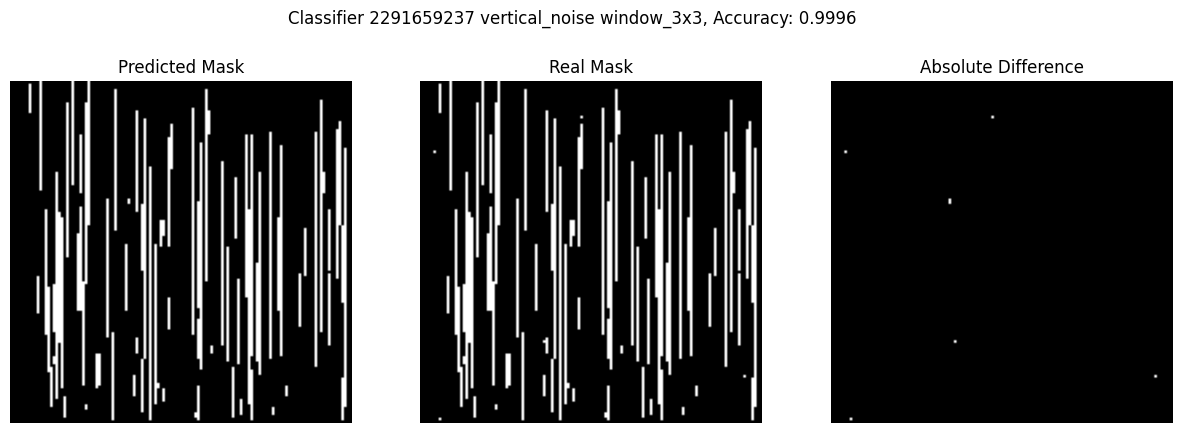

Classifier 2 - Seed: 2441695047, Noise Type: diagonal_noise, Window Type: window_3x3


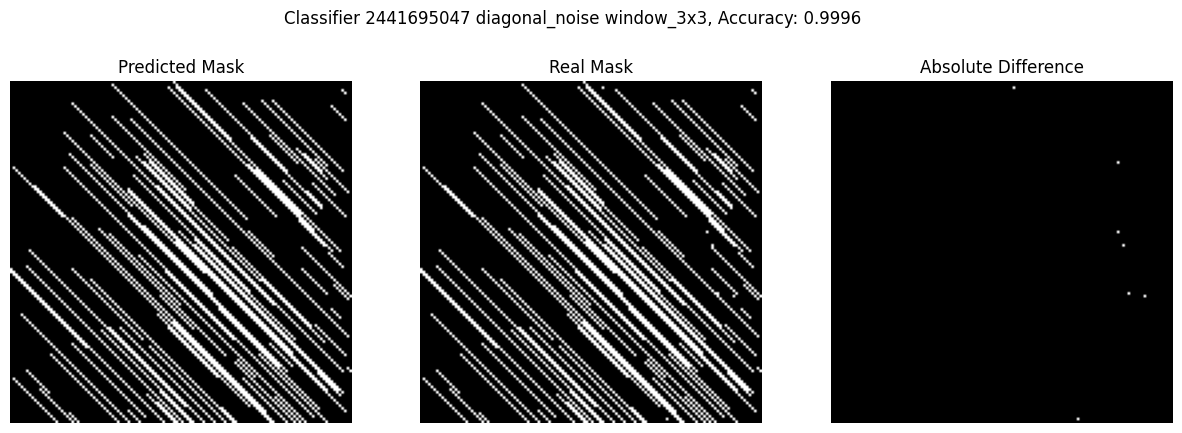

Classifier 3 - Seed: 2440749822, Noise Type: periodic_noise, Window Type: window_3x3


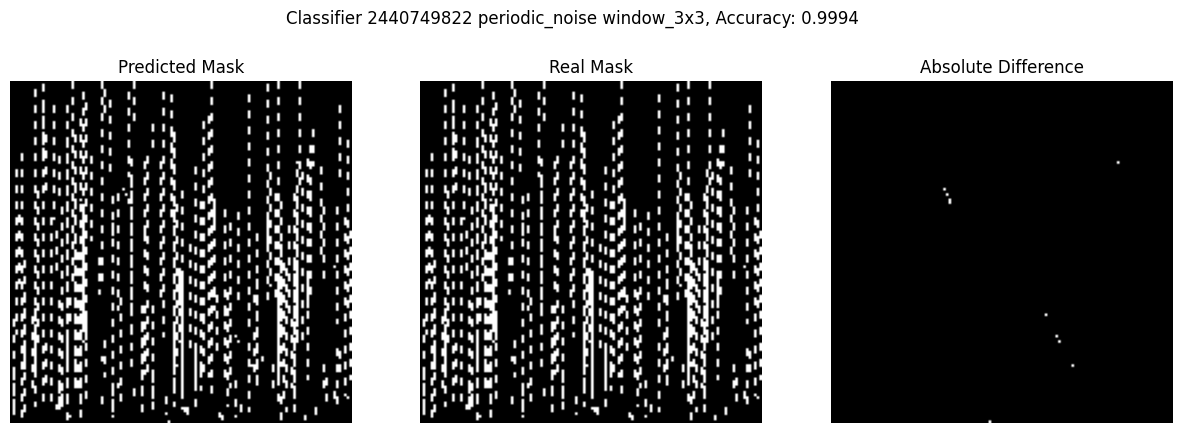

In [59]:
# import all results from results directory

classifier_stats_header = ['seed', 'noise_type', 'window_type', 'mutation_rate', 'total_evaluations', 'accuracy', 'precision', 'recall']
def import_top_results(results_dir):
    top_results = []

    classifier_results_summary = pd.read_csv(os.path.join(results_dir, 'classifier_stats.csv'), names=classifier_stats_header)
    top_vertical = classifier_results_summary[classifier_results_summary["noise_type"] == "vertical_noise"].nlargest(1, 'accuracy')['seed'].values[0]
    top_diagonal = classifier_results_summary[classifier_results_summary["noise_type"] == "diagonal_noise"].nlargest(1, 'accuracy')['seed'].values[0]
    top_periodic = classifier_results_summary[classifier_results_summary["noise_type"] == "periodic_noise"].nlargest(1, 'accuracy')['seed'].values[0]
    for top_result_seed in [top_vertical, top_diagonal, top_periodic]:
        # load the corresponding mask
        top_result_row = classifier_results_summary[classifier_results_summary['seed'] == top_result_seed]
        noise_type = top_result_row['noise_type'].values[0]
        window_type = top_result_row['window_type'].values[0]
        accuracy = top_result_row['accuracy'].values[0]

        filename = f"results_classifier_{noise_type}_{window_type}_{top_result_seed}.pkl"
        result_detail = pickle.load(open(os.path.join(results_dir, filename), 'rb'))
        
        pred_mask = result_detail['pred_mask']
        mask = result_detail['mask']
        top_results.append({
            'seed': top_result_seed,
            'noise_type': noise_type,
            'window_type': window_type,
            'predicted_mask': pred_mask,
            'accuracy': accuracy,
            'mask': mask
        })
    return top_results


top_results = import_top_results('results')
for i in range(len(top_results)):
    # compare the predicted mask with the ground truth mask
    print(f"Classifier {i+1} - Seed: {top_results[i]['seed']}, Noise Type: {top_results[i]['noise_type']}, Window Type: {top_results[i]['window_type']}")
    visualize_classifier(top_results[i])

## Results from image filtering

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pickle

In [57]:
def compare_images(filtered_image, original_image, noised_image, seed):
    """
    Compare two images to check how they differ.
    images: first image, second image, and the difference between them.
    
    Args:
        filtered_image (list): The first image to compare.
        original_image (list): The second image to compare.
    """
    # using matplotlib to visualize the images
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(noised_image, cmap='gray')
    ax1.set_title(f'Noised Image')
    ax1.axis('off')
    ax2.imshow(filtered_image, cmap='gray')
    ax2.set_title(f'Filtered Image {seed}')
    ax2.axis('off')
    ax3.imshow(original_image, cmap='gray')
    ax3.set_title('Original Image')
    ax3.axis('off')
    plt.show()

Loading results_filter_vertical_noise_window_3x3_2692156675.pkl
Loading results_filter_vertical_noise_window_3x3_1563022354.pkl
Loading results_filter_vertical_noise_window_3x3_1563617380.pkl


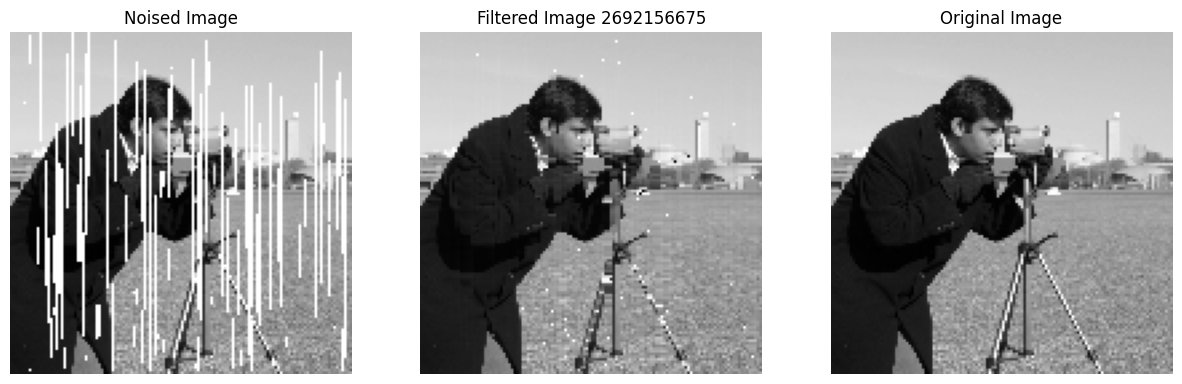

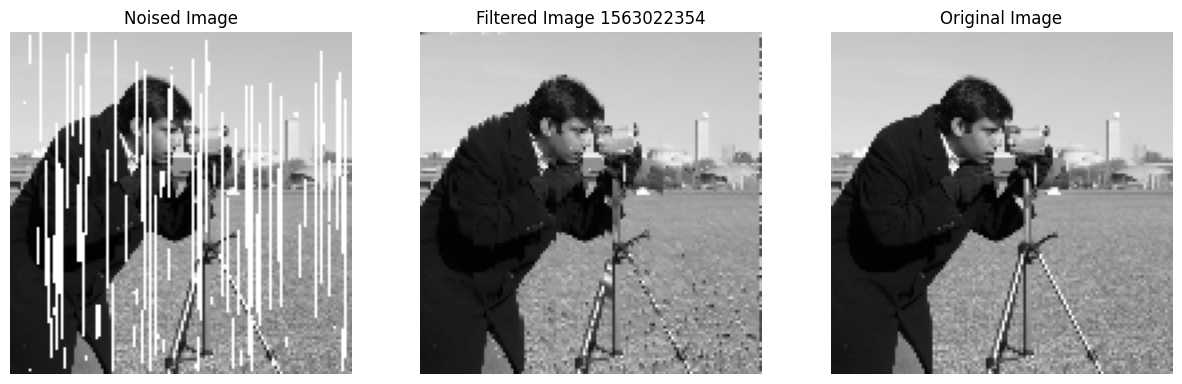

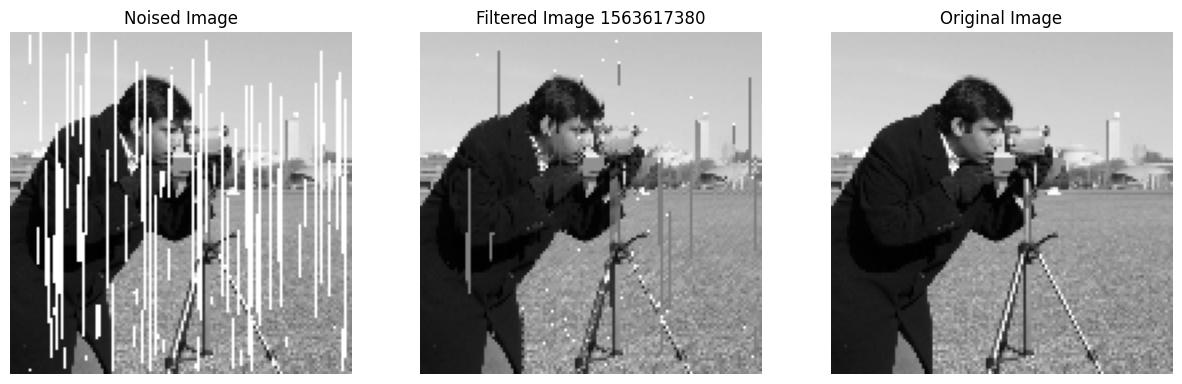

In [58]:
# import all results from results directory
def import_results(results_dir):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('results_filter') and filename.endswith('.pkl'):
            print(f'Loading {filename}')
            result = pickle.load(open(os.path.join(results_dir, filename), 'rb'))
            results.append(result)
    return results

results = import_results('results')
for i in range(len(results)):
    filtered = results[i]['filtered_image']
    original = results[i]['original_image']
    noised = results[i]['noised_image']
    # compare the predicted mask with the ground truth mask
    compare_images(filtered, original, noised, results[i]["seed"])

# Comparison with median filter